In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
plt.style.use(['science', 'notebook', 'grid'])

In [3]:
def a(k, w= np.pi/2):
    x = np.sin(2 * k * w)*((k * w) + 1j)
    y = -2*k*w*1j*np.cos(2*k*w)
    z = 2*(k**2) * (w**2)

    if k == 0:
        return 1
    else:
        return (x+y)/z
        
w= np.pi/2
k = 1

a(k)

(3.8981718325193755e-17+0.6366197723675814j)

In [4]:
def xN(N, w, t):
    buffer = []
    for k in range(-N, N+1, 1):
        product = a(k, w)*np.exp(1j*k*w*t)
        buffer.append(np.real(product))

    return np.sum(buffer)


w = np.pi/2
N = 50
t = 3
print(xN(N, w, t))


2.012727312625826


x_axis length: 100


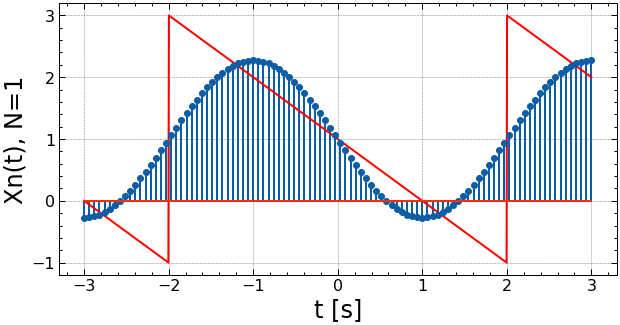

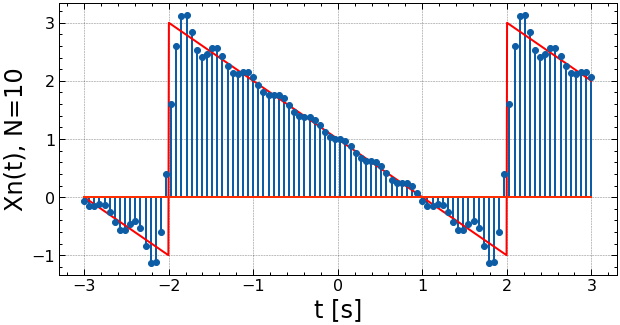

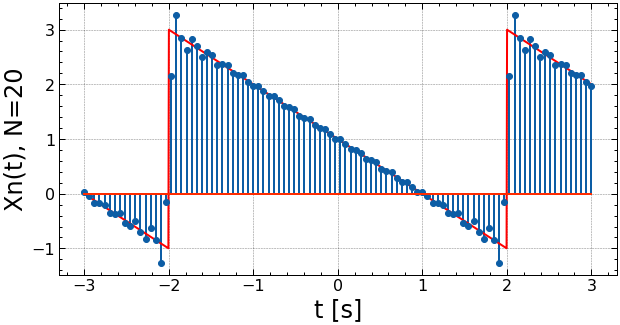

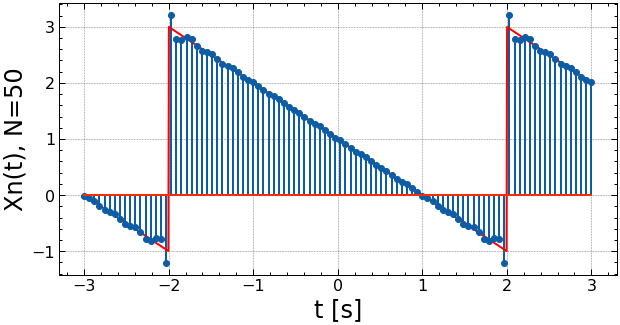

In [5]:
X = 3
x_axis = np.linspace(-X,X,100) #time
print(f'x_axis length: {len(x_axis)}')

timePoints = np.linspace(-X, X, 1000)

w = np.pi/2
N = [1,10,20,50]

for n in N:
    x_N = []
    for i in x_axis:
        x_N.append(xN(n,w,i))

    plt.figure(figsize=(10,5))
    plt.plot(timePoints, 2*signal.sawtooth(((2 * np.pi * 0.25 * timePoints)-np.pi),width=0)+1,color="red")
    plt.stem(x_axis, x_N)

    plt.xlabel('t [s]', fontsize=24)
    plt.ylabel(f'Xn(t), N={n}', fontsize=24)

    plt.savefig(f'Xn(t)N{n}.png')

In [6]:
def pN(xt, xn, amostras):
    return (np.sum((xt-xn)**2))/amostras

In [7]:
X = 2
amostras = 1000*X
timePoints = np.linspace(-X, X, amostras)

w = np.pi/2
N = [1, 10, 20, 50]

for n in N:
    x_N = []
    x_t = []
    for i in timePoints:
        x_N.append(xN(n, w, i))

    x_N = np.array(x_N)
    x_t = 2*signal.sawtooth(((2 * np.pi * 0.25 * timePoints)-np.pi), width=0)+1

    P = pN(xt=x_t, xn=x_N, amostras=amostras)
    print(f'Para N = {n}, Pn = {P}')


Para N = 1, Pn = 0.5245044832632534
Para N = 10, Pn = 0.07911436381835221
Para N = 20, Pn = 0.04153972162329742
Para N = 50, Pn = 0.018109707432599136


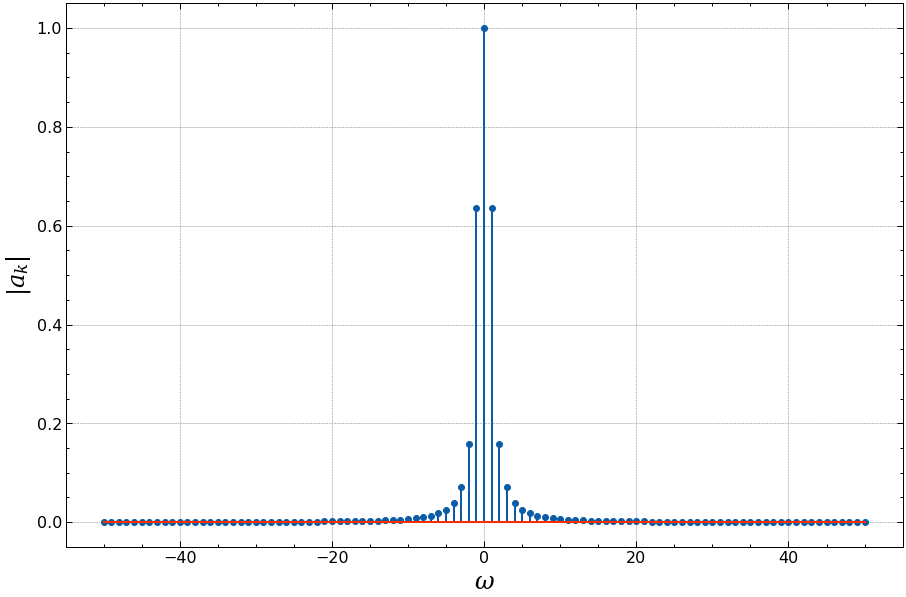

In [8]:
N = 50
w = np.pi/2

a_k = []
for n in range(-N, N+1):
    a_k.append(np.abs(a(n, n*w)))

plt.figure(figsize=(15, 10))
plt.stem(range(-N, N+1), a_k)

plt.xlabel('$\omega$', fontsize=24)
plt.ylabel(f'$|a_k$|', fontsize=24)

plt.savefig(f'akomegaN{N}.png')


In [9]:
def hjw(R, C, w):
    wc = 1/(R*C)
    try:
        eq = (1/(1-1j*(wc/w)))
        return eq
    except ZeroDivisionError:
        return 0

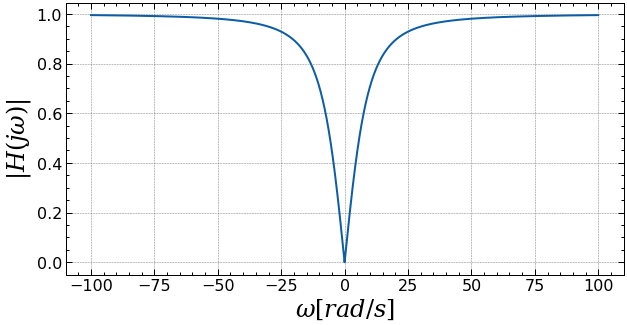

In [10]:
R = 100000
C = 0.000001

w = np.pi/2

X = 100
amostras = 1000*X
timePoints = np.linspace(-X, X, amostras)

h_jw = []
for i in timePoints:
    h_jw.append(np.abs(hjw(R,C,i)))

plt.figure(figsize=(10, 5))
plt.plot(timePoints, h_jw)

plt.xlabel('$\omega[rad/s]$', fontsize=24)
plt.ylabel(f'$|H(j\omega)|$', fontsize=24)

plt.savefig(f'Hjnabs.png')


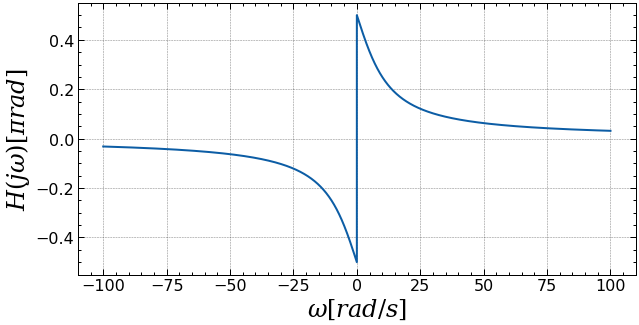

In [11]:
R = 100000
C = 0.000001

w = np.pi/2

X = 100
amostras = 1000*X
timePoints = np.linspace(-X, X, amostras)

h_jw = []
for i in timePoints:
    h_jw.append(np.angle(hjw(R,C,i))/np.pi)

plt.figure(figsize=(10, 5))
plt.plot(timePoints, h_jw)

plt.xlabel('$\omega[rad/s]$', fontsize=24)
plt.ylabel(f'$H(j\omega)[\pi rad]$', fontsize=24)

plt.savefig(f'Hjnangle.png')

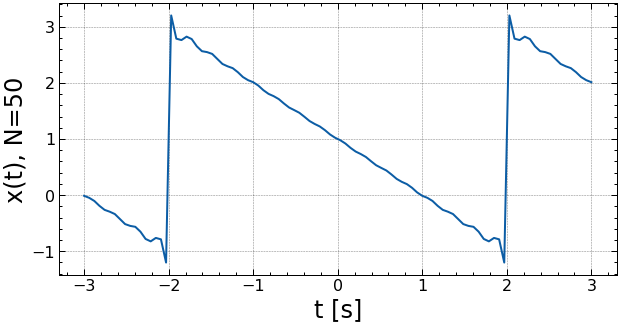

In [12]:
X = 3
x_axis = np.linspace(-X,X,100) #time

timePoints = np.linspace(-X, X, 1000)

w = np.pi/2
n = 50

x_N = []
for i in x_axis:
    x_N.append(xN(n,w,i))

plt.figure(figsize=(10,5))
plt.plot(x_axis, x_N)

plt.xlabel('t [s]', fontsize=24)
plt.ylabel(f'x(t), N={n}', fontsize=24)

plt.savefig(f'X(t)N{n}.png')

In [13]:
def H(k):
    # x = 1/(1-(20j/k*np.pi))
    if k == 0:
        return 0
    else:
        return 1/(1-(20j/k*np.pi))


def a(k, w):
    x = np.sin(2 * k * w)*((k * w) + 1j)
    y = -2*k*w*1j*np.cos(2*k*w)
    z = 2*(k**2) * (w**2)

    if k == 0:
        return 1
    else:
        return (x+y)/z


def yN(N, w, t):
    buffer = []
    for k in range(-N, N+1, 1):
        product = a(k, w) * H(k) * np.exp(1j*k*w*t)
        buffer.append(np.real(product))

    return np.sum(buffer)


x_axis length: 10000


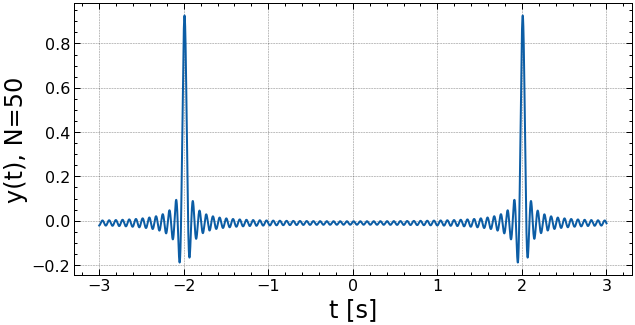

In [14]:
X1=-3
X2=3
x_axis = np.linspace(X1,X2,10000) #time
print(f'x_axis length: {len(x_axis)}')

w = np.pi/2
n = 50

y_t = []
for i in x_axis:
    y_t.append(yN(n,w,i))

plt.figure(figsize=(10,5))
plt.plot(x_axis, y_t)

plt.xlabel('t [s]', fontsize=24)
plt.ylabel(f'y(t), N={n}', fontsize=24)

plt.savefig(f'y(t)N{n}({X1}_{X2}).png')

x_axis length: 1000


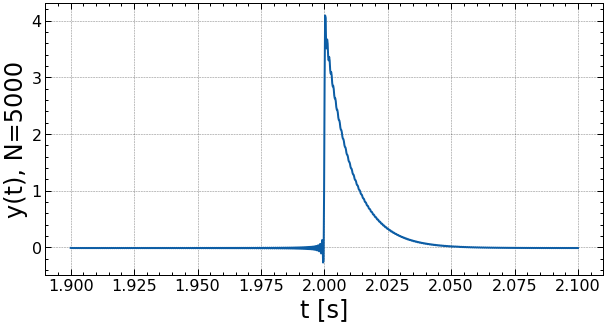

In [28]:
X1=1.9
X2=2.1
x_axis = np.linspace(X1,X2,1000) #time
print(f'x_axis length: {len(x_axis)}')

w = np.pi/2
n = 5000

y_t = []
for i in x_axis:
    y_t.append(yN(n,w,i))

plt.figure(figsize=(10,5))
plt.plot(x_axis, y_t)

plt.xlabel('t [s]', fontsize=24)
plt.ylabel(f'y(t), N={n}', fontsize=24)

plt.savefig(f'y(t)N{n}({X1}_{X2}).png')